# Modeling harmful algal blooms using deep learning algorithms

Thesis project

Nils T. Rafael

## Configuración del entorno 

In [54]:
# Establecer la variable de entorno para python
Sys.setenv("RETICULATE_PYTHON"="C:/Users/EQUIPO/.ai-navigator/conda/envs/OHW")

In [55]:
# Cargar las librerías
library(dplyr)
library(keras)
library(keras3)

Rows: 9000 Columns: 11
-- Column specification ---------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): microalgae
dbl  (9): location_id, year, density, classification, temperature (°C), dept...
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


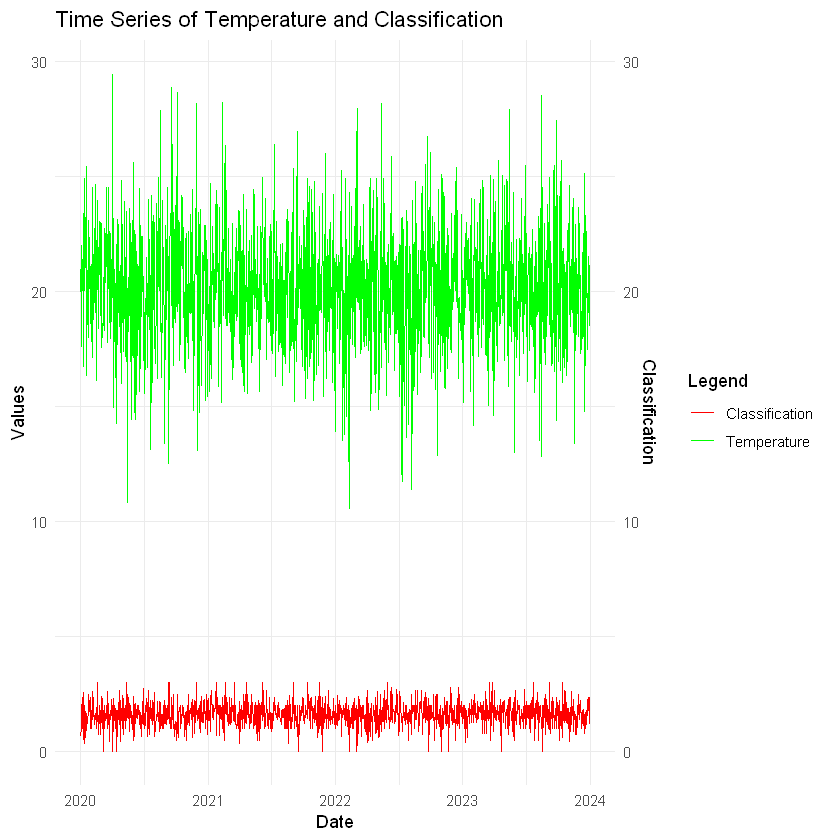

In [101]:

# Cargar las librerías necesarias
library(tidyverse)
library(lubridate)

# Cargar los datos desde el archivo CSV

data <- readr::read_csv("floraciones_algales_clasificacion.csv") 


# Convertir la columna 'date' a formato Date
data <- data %>%
  mutate(date = ymd(date))

# Agrupar los datos por fecha y calcular la temperatura y clasificación promedio
time_series_data <- data %>%
  group_by(date) %>%
  summarize(average_temperature = mean(`temperature (°C)`, na.rm = TRUE),
            average_classification = mean(classification, na.rm = TRUE))

# Crear la serie de tiempo
ggplot(time_series_data, aes(x = date)) +
  geom_line(aes(y = average_temperature, color = "Temperature")) +
  geom_line(aes(y = average_classification, color = "Classification")) +
  scale_y_continuous(
    name = "Values",
    sec.axis = sec_axis(~ ., name = "Classification")
  ) +
  labs(
    title = "Time Series of Temperature and Classification",
    x = "Date"
  ) +
  theme_minimal() +
  scale_color_manual(
    name = "Legend",
    values = c("Temperature" = "green", "Classification" = "red")
  )

Rows: 9000 Columns: 11
-- Column specification ---------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): microalgae
dbl  (9): location_id, year, density, classification, temperature (°C), dept...
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


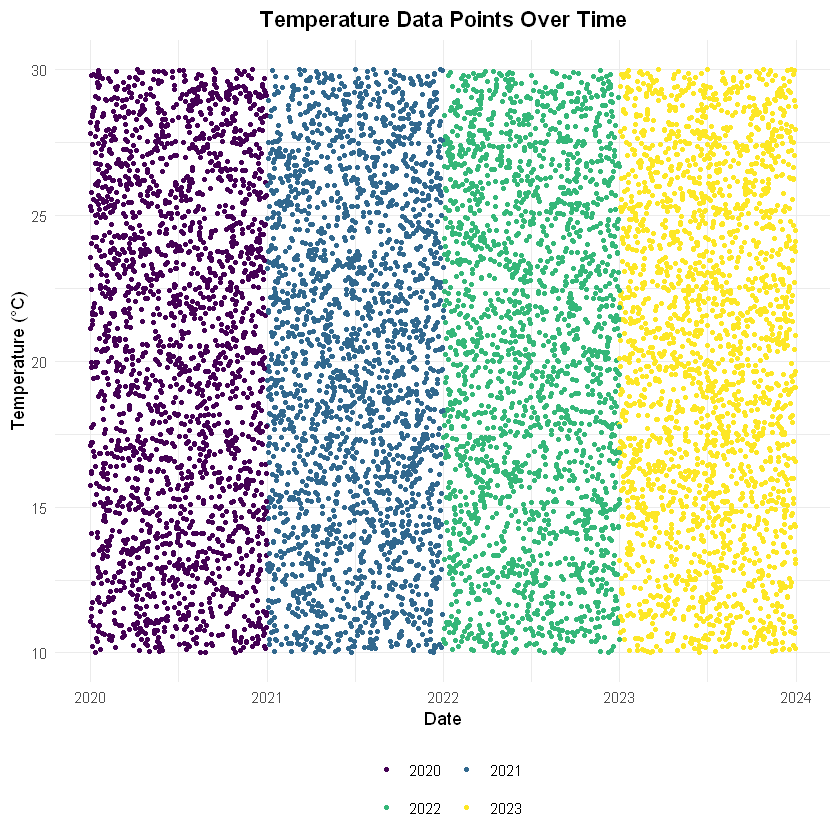

In [107]:
# Cargar las librerías necesarias
library(tidyverse)
library(lubridate)
library(ggplot2)
# Cargar los datos desde el archivo CSV

data <- readr::read_csv("floraciones_algales_clasificacion.csv") 
# Convertir la columna 'date' a formato Date
data <- data %>%
  mutate(date = ymd(date))

# Crear el gráfico de serie de tiempo con puntos
ggplot(data, aes(x = date, y = `temperature (°C)`, color = factor(year(date)))) +
  geom_point(size = 1) +
  scale_color_viridis_d() +
  labs(
    title = "Temperature Data Points Over Time",
    x = "Date",
    y = "Temperature (°C)",
    color = "Year"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    legend.title = element_blank(),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  ) +
  guides(color = guide_legend(nrow = 2, byrow = TRUE))

In [56]:
# Leer archivo csv
data <- readr::read_csv("floraciones_algales_clasificacion.csv") 
head(data)

Rows: 9000 Columns: 11
-- Column specification ---------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): microalgae
dbl  (9): location_id, year, density, classification, temperature (°C), dept...
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


location_id,date,year,microalgae,density,classification,temperature (°C),depth (m),currents (Sv),salinity (ups),wind (m/s)
<dbl>,<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
36,2020-01-17,2023,Akashiwo sanguínea,7674.295,0,28.99943,43.058408,1.9453468,32.55234,9.715190
40,2023-12-03,2022,Akashiwo sanguínea,126771.775,3,22.17029,45.376175,0.8129778,37.34728,2.255112
20,2021-03-13,2020,Akashiwo sanguínea,107930.953,3,14.94610,13.657457,0.9104064,37.48884,1.341508
20,2021-01-19,2020,Akashiwo sanguínea,72559.943,1,22.25525,21.996149,0.3744108,37.38657,7.072020
19,2021-03-18,2021,Akashiwo sanguínea,29665.688,0,18.02489,4.779045,0.8619455,39.52053,4.010620
38,2021-08-29,2023,Akashiwo sanguínea,3915.654,0,22.31502,9.604522,1.8548851,35.59056,10.049064


In [57]:
# Convertir el año a factor
data$year <- as.factor(data$year)

In [58]:
# Separar los datos en entrenamiento (2020-2022) y prueba (2023)
train_data <- data %>% filter(year %in% c(2020, 2021, 2022))
test_data <- data %>% filter(year == 2023)

In [66]:
# Seleccionar las características y la etiqueta
train_x <- train_data %>% select("density", "temperature (°C)", "depth (m)", "currents (Sv)", "salinity (ups)", "wind (m/s)")
train_y <- train_data %>% select("density", "temperature (°C)", "depth (m)", "currents (Sv)", "salinity (ups)", "wind (m/s)")

In [67]:
length(train_x)
length(train_y)

[1] 6

[1] 6

In [68]:
# Crear test_x basado en test_data  
test_x <- test_data %>% select("density", "temperature (°C)", "depth (m)", "currents (Sv)", "salinity (ups)", "wind (m/s)")
test_y <- test_data %>% select("density", "temperature (°C)", "depth (m)", "currents (Sv)", "salinity (ups)", "wind (m/s)")

In [69]:
# Normalizar los datos
preproc <- preProcess(train_x, method = c("center", "scale"))
train_x <- predict(preproc, train_x)
test_x <- predict(preproc, test_x)

In [70]:
#?to_categorical
# Supón que ya se han definido train_y y test_y  
train_y <- c(0, 1, 2, 3)  # Ejemplo, ajusta a tus datos  
test_y <- c(1, 0, 3, 2)   # Asegúrate de definir test_y  

In [71]:
# Convertir las etiquetas a factores y luego a categorías
train_y <- to_categorical(as.integer(train_y), num_classes = 4) # Cambia num_classes según tu caso  
test_y <- to_categorical(as.integer(test_y), num_classes = 4)  

In [72]:
# Construir el modelo
model <- keras_model_sequential() %>%
  layer_dense(units = 64, activation = 'relu', input_shape = ncol(train_x)) %>%
  layer_dense(units = 64, activation = 'relu') %>%
  layer_dense(units = 4, activation = 'softmax')

In [73]:
# Compilar el modelo
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)


In [75]:
# Entrenar el modelo
history <- model %>% fit(
  as.matrix(train_x),
  train_y,
  epochs = 30,
  batch_size = 32,
  validation_split = 0.2
)


ERROR: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 5384
'y' sizes: 4


In [48]:
# Evaluar el modelo
score <- model %>% evaluate(as.matrix(test_x), test_y)
cat('Test loss:', score$loss, '\n')
cat('Test accuracy:', score$accuracy, '\n')

# Hacer predicciones
predictions <- model %>% predict_classes(as.matrix(test_x))

# Convertir predicciones y etiquetas verdaderas de vuelta a sus formas originales
test_y_original <- apply(test_y, 1, which.max) - 1

# Crear una matriz de confusión
confusion_matrix <- table(Predicted = predictions, Actual = test_y_original)
print(confusion_matrix)

# Calcular medidas de rendimiento
precision <- posPredValue(as.factor(predictions), as.factor(test_y_original), positive = "1")
recall <- sensitivity(as.factor(predictions), as.factor(test_y_original), positive = "1")
f1_score <- 2 * ((precision * recall) / (precision + recall))

cat('Precision:', precision, '\n')
cat('Recall:', recall, '\n')
cat('F1 Score:', f1_score, '\n')


ERROR: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 5384
'y' sizes: 64


In [5]:
# Cargar los bibliotecas
library(keras)
library(dplyr)
library(keras3)

Registered S3 methods overwritten by 'keras':
  method                               from  
  as.data.frame.keras_training_history keras3
  plot.keras_training_history          keras3
  print.keras_training_history         keras3
  r_to_py.R6ClassGenerator             keras3


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'keras3'


The following objects are masked from 'package:keras':

    %<-active%, %py_class%, activation_elu, activation_exponential,
    activation_gelu, activation_hard_sigmoid, activation_linear,
    activation_relu, activation_selu, activation_sigmoid,
    activation_softmax, activation_softplus, activation_softsign,
    activation_tanh, adapt, application_densenet121,
    application_densenet169, application_densenet201,
    application_efficientnet_b0, application_efficientnet_b1,
    appli

In [6]:
# Cargar la funciones auxiliares
source("tutorial_functions.R")

## Lectura y preprocesamiento

In [76]:
# Leer archivo csv
raw_data <- readr::read_csv("tutorial_data_test.csv") 
#head(raw_data)

Rows: 6273 Columns: 22
-- Column specification ---------------------------------------------------------------------------------------------
Delimiter: ","
chr   (2): id, location_id
dbl  (19): gap_days, year, classification, total_toxicity, t1, t2, t3, t4, t...
date  (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# Transformación logaritmica
raw_data <- raw_data %>%
    log_inputs(vars = c("t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10", "t11", "t12"))

## Generación de imágenes

In [6]:
#Generate images from data
image_list <- make_image_list(raw_data,
                              tox_levels =     c(0,10,30,80),
                              forecast_steps = 1,
                              n_steps =        2,
                              minimum_gap =    4,
                              maximum_gap =    10,
                              toxins =         c("t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10", "t11", "t12"),
                              environmentals = c("sst_cum"))

In [7]:
#Splits image_list by year for grouping into train/test data
years <- sapply(image_list, function(x) {return(x$year)})
#str(years)

In [8]:
#image_list <- split(image_list,as.factor(years))
image_list <- split(image_list, years)
#str(image_list)

In [9]:
#configuration
YEARS_TRAINING <-   c("2014", "2016", "2017")
YEARS_TESTING <-    "2015"

In [10]:
#Make a training set
train <- pool_images_and_labels(image_list[YEARS_TRAINING], num_classes = 4)

In [11]:
#Make a test set
test <- pool_images_and_labels(image_list[YEARS_TESTING], num_classes = 4)

In [12]:
#load(file = "data.Rdata")

In [13]:
#dim(raw_data)

In [14]:
#length(years)

In [16]:
model <- keras::keras_model_sequential() %>% 
  keras::layer_dense(units=64, 
                     activation = "relu", 
                     input_shape = dim(train$image)[2],
                     name = "input_layer") %>%
  keras::layer_dropout(rate = 0.4,
                       name = "dropout_1") %>% 
  keras::layer_dense(units=32, 
                     activation = "relu",
                     name = "hidden_1") %>% 
  keras::layer_dropout(rate=0.3,
                       name = "dropout_2") %>% 
  keras::layer_dense(units=16, 
                     activation = "relu",
                     name = "hidden_2") %>% 
  keras::layer_dropout(rate=0.2,
                       name = "dropout_3") %>%
  keras::layer_dense(units = 4, 
                     activation = "softmax",
                     name = "output")

summary(model)

Model: "sequential_1"
<U+250F><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2533><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2533><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2513>
<U+2503> Layer (type)                      <U+2503> Output Shape             <U+2503>       Param # <U+2503>
<U+2521><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2501><U+2

In [17]:
str(train)
head(train$labels)

List of 7
 $ labels         : num [1:3413, 1:4] 1 1 0 1 1 1 1 1 1 0 ...
 $ image          : num [1:3413, 1:26] 0 0 0 0.379 0 ...
 $ classifications: num [1:3413] 0 0 2 0 0 0 0 0 0 3 ...
 $ toxicity       : num [1:3413] 0 0 45.21 4.18 2.65 ...
 $ locations      : chr [1:3413] "PSP12.01" "PSP24.13" "PSP10.11" "PSP15.25" ...
 $ dates          : num [1:3413] 16964 16238 17307 17336 17314 ...
 $ scaling_factors: NULL


1,0,0,0
1,0,0,0
0,0,1,0
1,0,0,0
1,0,0,0
1,0,0,0


In [18]:
model %>% keras::compile(optimizer =  "adam",
                         loss =       "categorical_crossentropy", 
                         metrics =    "categorical_accuracy")

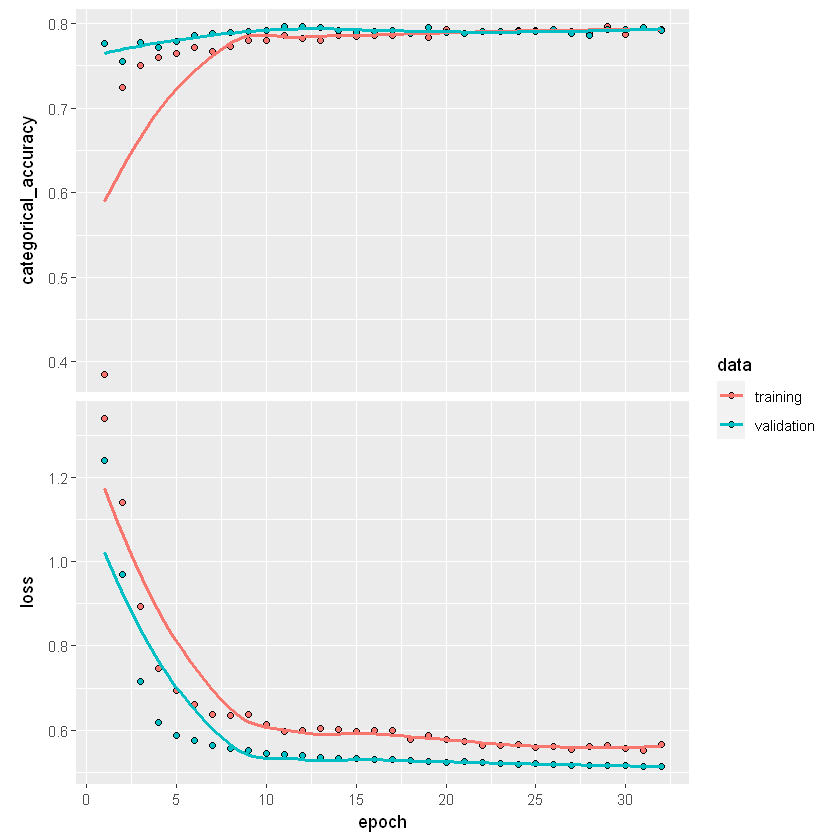

In [19]:
history <- model %>% 
    keras::fit(x = train$image,
               y = train$labels,
               batch_size = 128,
               epochs = 32,
               verbose=1,
               validation_split = 0.2,
               shuffle = TRUE)

plot(history)

In [20]:
metrics <- model %>% 
  keras::evaluate(x = test$image,
                  y = test$labels)

predictions <- model %>% predict(test$image) %>% k_argmax() %>% as.array()
  #keras::predict_classes(test$image)

predicted_probs <- model %>% 
      predict(test$image)

metrics

$categorical_accuracy
[1] 0.8972733

$loss
[1] 0.4113985

In [21]:
predictions

[1] 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0
  [38] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 0 0 0 0 0 1 0 3 0 0 0 0 1 0 0 0 0
  [75] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 1 0
 [186] 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 3
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 [334] 0 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 [408] 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 [630] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 1 3 0 0
 [667] 0 0 0 0 0 0 0 1 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 3 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 [815] 0 0 3 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 3 0 1
 [963] 0 0 0 0 1 0 3 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0
[1037] 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 1 0 0 0 0 0 3 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0
[1222] 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0
[1333] 0 0 0 2 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[1407] 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
[1555] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0

In [22]:
results <- dplyr::tibble(location = test$locations,
                         date = as.Date(as.numeric(test$dates), origin = as.Date("1970-01-01")),
                         actual_classification = test$classifications,
                         predicted_classification = predictions) %>% 
      dplyr::mutate(prob_0 = predicted_probs[,1]*100,
                    prob_1 = predicted_probs[,2]*100,
                    prob_2 = predicted_probs[,3]*100,
                    prob_3 = predicted_probs[,4]*100)

head(results)

location,date,actual_classification,predicted_classification,prob_0,prob_1,prob_2,prob_3
<chr>,<date>,<dbl>,<dbl[1d]>,<dbl>,<dbl>,<dbl>,<dbl>
PSP26.11,2015-08-11,0,0,94.531071,5.216153,0.18810517,0.064673979
PSP10.25,2015-06-01,0,0,91.465598,7.823986,0.50884802,0.201569055
PSP15.13,2015-09-03,0,0,98.496348,1.487587,0.01301790,0.003048059
PSP12.002,2015-05-26,1,3,5.239873,17.535442,36.16708815,41.057595611
PSP25.02,2015-07-14,0,0,96.321362,3.564764,0.08700478,0.026877588
PSP27.46,2015-08-10,2,1,24.615008,52.814686,16.17257595,6.397730112


In [23]:
metrics[2]

$loss
[1] 0.4113985

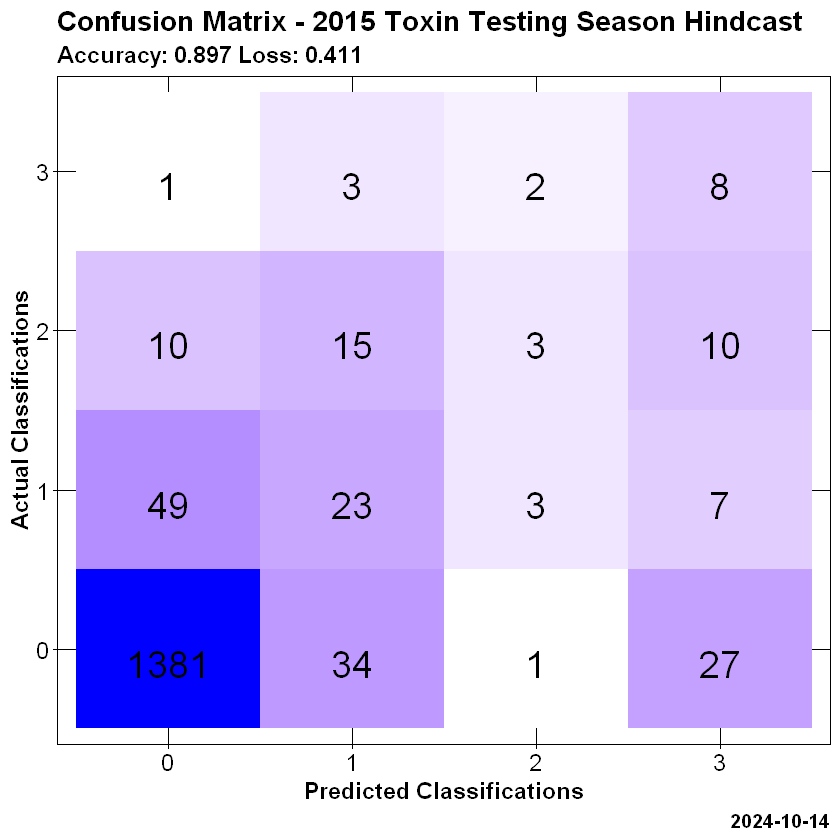

In [24]:
num_levels <- 4
levels <- seq(from=0, to=(num_levels-1))

cm <- as.data.frame(table(predicted = factor(predictions, levels), actual = factor(test$classifications, levels)))
  
confusion_matrix <- ggplot2::ggplot(data = cm,
                                    mapping = ggplot2::aes(x = .data$predicted, y = .data$actual)) +
  ggplot2::geom_tile(ggplot2::aes(fill = log(.data$Freq+1))) +
  ggplot2::geom_text(ggplot2::aes(label = sprintf("%1.0f", .data$Freq)), vjust = 1, size=8) +
  ggplot2::scale_fill_gradient(low = "white", 
                               high = "blue") +
  ggplot2::labs(x = "Predicted Classifications", 
                y = "Actual Classifications", 
                title=paste("Confusion Matrix -", YEARS_TESTING, "Toxin Testing Season Hindcast",sep=" "),
                subtitle=paste("Accuracy:", round(metrics[1]$categorical_accuracy, 3), "Loss:", round(metrics[2]$loss, 3), sep=" "),
                caption=paste(Sys.Date())) +
  ggplot2::theme_linedraw() +
  ggplot2::theme(axis.text=  ggplot2::element_text(size=14),
                 axis.title= ggplot2::element_text(size=14,face="bold"),
                 title =     ggplot2::element_text(size = 14, face = "bold"),
                 legend.position = "none") 

confusion_matrix